<a href="https://colab.research.google.com/github/Noob919/COVID_19-XRAY-Classification/blob/main/Simple_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
# from tensorflow.keras.applications.resnet50 import preprocess_input
# from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
import os
from PIL import Image

In [2]:
test_path_pneumonia = "/content/drive/MyDrive/chest_xray/test/PNEUMONIA"
test_path_normal = "/content/drive/MyDrive/chest_xray/test/NORMAL"

train_path_pneumonia = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
train_path_normal = "/content/drive/MyDrive/chest_xray/train/NORMAL"

val_path_pneumonia = "/content/drive/MyDrive/chest_xray/val/PNEUMONIA"
val_path_normal = "/content/drive/MyDrive/chest_xray/val/NORMAL"

In [20]:
data_dir_test = "/content/drive/MyDrive/chest_xray/test"
img_height,img_width=128,128
batch_size=32
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=42,
  color_mode = 'grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 624 files belonging to 2 classes.


In [21]:
data_dir_train = "/content/drive/MyDrive/chest_xray/train"
img_height,img_width=128,128
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=42,
  color_mode = 'grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.


In [25]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1,activation='softmax')
    ])

In [26]:
model.compile(optimizer="adam",loss="BinaryCrossentropy", metrics=["accuracy"])

In [27]:
model.fit(train_ds, validation_data = test_ds,batch_size=32,epochs=2)

Epoch 1/2
163/163 [==============================] - 457s 3s/step - loss: 148.5822 - accuracy: 0.7429 - val_loss: 18.2849 - val_accuracy: 0.6250
Epoch 2/2
163/163 [==============================] - 33s 194ms/step - loss: 27.5219 - accuracy: 0.7429 - val_loss: 31.0028 - val_accuracy: 0.6250


In [29]:
values = pd.DataFrame(model.history.history)

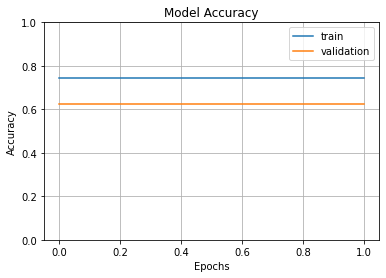

In [30]:
fig1 = plt.gcf()
plt.plot(values['accuracy'])
plt.plot(values['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.ylim(0,1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

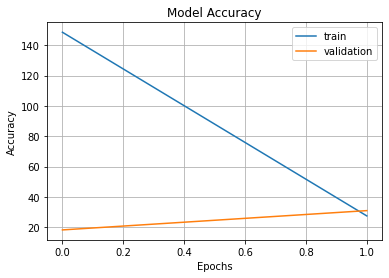

In [33]:
fig1 = plt.gcf()
plt.plot(values['loss'])
plt.plot(values['val_loss'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()